In [284]:
# import package
import numpy as np
import pandas as pd

import os

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import plotly.express as px

In [285]:
print(os.listdir('D:/University/NĂM 3/Kì 6/Basic Data Analysis/Project/Data and analyze/Data'))

['car_insurance_claim.csv']


In [286]:
df = pd.read_csv('D:/University/NĂM 3/Kì 6/Basic Data Analysis/Project/Data and analyze/Data/car_insurance_claim.csv')

In [287]:
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS  ... CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED MVR_PTS  \
0        $0    z_No  ...  Minivan     yes   $4,461         2      No       3   
1  $257,252    z_No  ...  Minivan     yes       $0         0      No       0   
2        $0    z_No  ...      Van     yes       $0         0      No       2   
3  $124,191     Yes  ...    z_SUV      no  $38,690         2      No       3   
4  $306,251     Yes  ...  Minivan     yes       $0         0      No       0   

   CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0       $0    18.0          0  Highly Urban/ Urban  
1       $0     1.0          0  Highly Urban/ Urban  
2       $0    10.0          0  Highly Urban/ Urban  
3       $0    10.0          0  Highly Urban/ Urban  
4       $0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

Link giải thích: 

http://rstudio-pubs-static.s3.amazonaws.com/383423_f41b46425643441eb5050bc8fb544d74.html

In [288]:
df.drop('BIRTH', axis=1, inplace=True)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [290]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY'],
      dtype='object')

First of all, we need to change the wrong format in some columns to make it consistent.

In [291]:
df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '').astype(float)
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '').astype(float)
df['OLDCLAIM'] = df['OLDCLAIM'].str.replace('$', '').str.replace(',', '').astype(float)
df['CLM_AMT'] = df['CLM_AMT'].str.replace('$', '').str.replace(',', '').astype(float)
df['GENDER'] = df['GENDER'].str.replace('z_', '')
df['MSTATUS'] = df['MSTATUS'].str.replace('z_', '')
df['EDUCATION'] = df['EDUCATION'].str.replace('z_','').str.replace('<','')
df['OCCUPATION'] = df['OCCUPATION'].str.replace('z_','')
df['BLUEBOOK'] = df['BLUEBOOK'].str.replace('$','').str.replace(',','').astype(int) 
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace('z_','')
df['URBANICITY'] = df['URBANICITY'].str.replace('Highly Urban/ ','').str.replace('z_Highly Rural/ ','')

Change the value in this Claim Amount columns if value >= 1 so change to equal 1. Because in this project our goal predicts will customers use car insurance with your company, the value amount just give you know the value of insurance can pay for this customer (based on package).

In [292]:
df['CLM_AMT'].mask(df['CLM_AMT'] >= 1, 1, inplace=True)

In [293]:
df['CLM_AMT'].value_counts()

0.0    7556
1.0    2746
Name: CLM_AMT, dtype: int64

## Drop duplicate

To drop duplicate, we need to check the duplicate in all columns (except ID) and we remove some rows has the same value.

In [294]:
subsets = []
for i in df.columns:
    if i != 'ID':
        subsets.append(i)

print('Number of rows before drop duplicate: %s' %len(df))
df.drop_duplicates(subset=subsets, keep=False)
print('number of rows after drop duplicate: %s' %len(df))


Number of rows before drop duplicate: 10302
number of rows after drop duplicate: 10302


Don't have any row in this dataset in duplicate

## Check dtypes of column

Create 2 list include 2 type of each column has (numeric and category)

In [295]:
numeric = []
category = []

for i in df.columns:
    if df[i].dtypes == 'object':
        category.append(i)
    else:
        numeric.append(i)

print(category)
print(numeric)

['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


Next, we need to find which column just has 2 unique values. It will make us use the methods after in one-hot coding and create dummy.

We will create dummy for columns just has 2 unique values and which column has 3 or more unique value will create by one-hot encoding.

In [296]:
# Check in category
category_2val = []
for i in category: 
    if len(df[i].unique()) == 2:
        category_2val.append(i)

category_2val

['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']

In [297]:
df

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL  \
0       63581743         0  60.0         0  11.0   67349.0      No       0.0   
1      132761049         0  43.0         0  11.0   91449.0      No  257252.0   
2      921317019         0  48.0         0  11.0   52881.0      No       0.0   
3      727598473         0  35.0         1  10.0   16039.0      No  124191.0   
4      450221861         0  51.0         0  14.0       NaN      No  306251.0   
...          ...       ...   ...       ...   ...       ...     ...       ...   
10297   67790126         1  45.0         2   9.0  164669.0      No  386273.0   
10298   61970712         0  46.0         0   9.0  107204.0      No  332591.0   
10299  849208064         0  48.0         0  15.0   39837.0      No  170611.0   
10300  627828331         0  50.0         0   7.0   43445.0      No  149248.0   
10301  680381960         0  52.0         0  11.0   53235.0      No  197017.0   

      MSTATUS GENDER  ...     CAR_TYPE RED_CAR  OLDCLAIM CLM_FREQ  REVOKED  \
0          No      M  ...      Minivan     yes    4461.0        2       No   
1          No      M  ...      Minivan     yes       0.0        0       No   
2          No      M  ...          Van     yes       0.0        0       No   
3         Yes      F  ...          SUV      no   38690.0        2       No   
4         Yes      M  ...      Minivan     yes       0.0        0       No   
...       ...    ...  ...          ...     ...       ...      ...      ...   
10297     Yes      M  ...      Minivan      no       0.0        0       No   
10298     Yes      M  ...  Panel Truck      no       0.0        0       No   
10299     Yes      F  ...          SUV      no       0.0        0       No   
10300     Yes      F  ...      Minivan      no       0.0        0       No   
10301     Yes      F  ...      Minivan      no       0.0        0       No   

       MVR_PTS CLM_AMT CAR_AGE  CLAIM_FLAG  URBANICITY  
0            3     0.0    18.0           0       Urban  
1            0     0.0     1.0           0       Urban  
2            2     0.0    10.0           0       Urban  
3            3     0.0    10.0           0       Urban  
4            0     0.0     6.0           0       Urban  
...        ...     ...     ...         ...         ...  
10297        2     0.0    17.0           0       Urban  
10298        0     0.0     1.0           0       Urban  
10299        0     0.0     1.0           0       Urban  
10300        0     0.0    11.0           0       Urban  
10301        0     0.0     9.0           0       Rural  

[10302 rows x 26 columns]

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  int32  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  float64
 19  CLM_FREQ    10302 non-nul

## Handle missing values

Find the column has missing values and calculate the percentage of missing values in this columns

Next we will fill the missing values by __KNN imputation__ methods. We use this method because in some papers (we will attach later) they said that the KNN imputation is better than the mean/median methods and they had proven through some dataset for clarify their assumption.

In [299]:
# Check null
def missing_value_table(df):

    # create missing column
    missing_value = df.isna().sum()

    # create percentage missing column
    percentage_missing = 100 * df.isna().sum() / len(df)

    # concat 2 columns
    table_1 = pd.concat([missing_value,percentage_missing], axis=1)

    # rename 2 columns
    table_2 = table_1.rename(columns={0:'Missing Value', 1:'Percentage of Missing'})

    # sort the missing value by descending
    table_3 = table_2[table_2.iloc[:,1] != 0].sort_values('Percentage of Missing', ascending=False).round(1)

    # Print some sentence
    print('These dataframe has', str(df.shape[1]), 'columns')
    print('These dataframe has', str(table_3.shape[0]), 'columns which has null values')

    return(table_3)

In [300]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 6 columns which has null values


Missing Value  Percentage of Missing
OCCUPATION            665                    6.5
CAR_AGE               639                    6.2
HOME_VAL              575                    5.6
INCOME                570                    5.5
YOJ                   548                    5.3
AGE                     7                    0.1


Because the occupation is the category columns so we fill the missing values my add the value has the most frequent happen in this column __(MODE)__


In [301]:
df.loc[:,'OCCUPATION']

0        Professional
1         Blue Collar
2             Manager
3            Clerical
4         Blue Collar
             ...     
10297         Manager
10298             NaN
10299     Blue Collar
10300      Home Maker
10301        Clerical
Name: OCCUPATION, Length: 10302, dtype: object

In [302]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

In [303]:
df['OCCUPATION'].isna().sum()

0

In [304]:
# Check again
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 5 columns which has null values


Missing Value  Percentage of Missing
CAR_AGE             639                    6.2
HOME_VAL            575                    5.6
INCOME              570                    5.5
YOJ                 548                    5.3
AGE                   7                    0.1

In [305]:
# Check the correlation
correlation_1 = df[subsets].corr()


<AxesSubplot:>

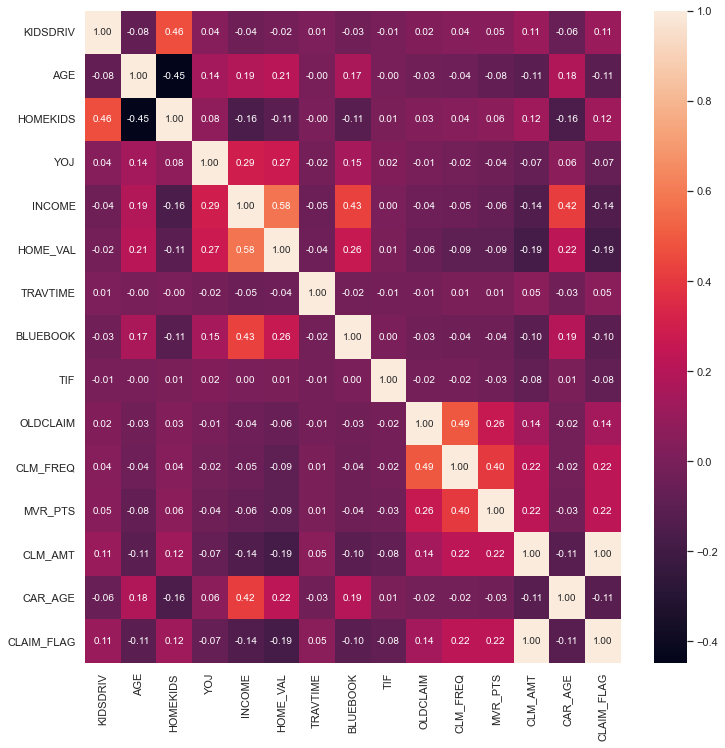

In [306]:
plt.figure(figsize=(12,12))

sns.heatmap(correlation_1, annot=True, fmt=".2f")

In [307]:
from sklearn.impute import KNNImputer

In [308]:
df_try_1 = df[subsets].copy()
df_try_1

KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME PARENT1  HOME_VAL MSTATUS  \
0             0  60.0         0  11.0   67349.0      No       0.0      No   
1             0  43.0         0  11.0   91449.0      No  257252.0      No   
2             0  48.0         0  11.0   52881.0      No       0.0      No   
3             0  35.0         1  10.0   16039.0      No  124191.0     Yes   
4             0  51.0         0  14.0       NaN      No  306251.0     Yes   
...         ...   ...       ...   ...       ...     ...       ...     ...   
10297         1  45.0         2   9.0  164669.0      No  386273.0     Yes   
10298         0  46.0         0   9.0  107204.0      No  332591.0     Yes   
10299         0  48.0         0  15.0   39837.0      No  170611.0     Yes   
10300         0  50.0         0   7.0   43445.0      No  149248.0     Yes   
10301         0  52.0         0  11.0   53235.0      No  197017.0     Yes   

      GENDER    EDUCATION  ...     CAR_TYPE  RED_CAR OLDCLAIM  CLM_FREQ  \
0          M          PhD  ...      Minivan      yes   4461.0         2   
1          M  High School  ...      Minivan      yes      0.0         0   
2          M    Bachelors  ...          Van      yes      0.0         0   
3          F  High School  ...          SUV       no  38690.0         2   
4          M  High School  ...      Minivan      yes      0.0         0   
...      ...          ...  ...          ...      ...      ...       ...   
10297      M          PhD  ...      Minivan       no      0.0         0   
10298      M      Masters  ...  Panel Truck       no      0.0         0   
10299      F  High School  ...          SUV       no      0.0         0   
10300      F    Bachelors  ...      Minivan       no      0.0         0   
10301      F  High School  ...      Minivan       no      0.0         0   

       REVOKED MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG URBANICITY  
0           No       3     0.0     18.0           0      Urban  
1           No       0     0.0      1.0           0      Urban  
2           No       2     0.0     10.0           0      Urban  
3           No       3     0.0     10.0           0      Urban  
4           No       0     0.0      6.0           0      Urban  
...        ...     ...     ...      ...         ...        ...  
10297       No       2     0.0     17.0           0      Urban  
10298       No       0     0.0      1.0           0      Urban  
10299       No       0     0.0      1.0           0      Urban  
10300       No       0     0.0     11.0           0      Urban  
10301       No       0     0.0      9.0           0      Rural  

[10302 rows x 25 columns]

In [309]:
df_knn = df.filter(subsets, axis=1).copy()
df_knn.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL MSTATUS GENDER  \
0         0  60.0         0  11.0  67349.0      No       0.0      No      M   
1         0  43.0         0  11.0  91449.0      No  257252.0      No      M   
2         0  48.0         0  11.0  52881.0      No       0.0      No      M   
3         0  35.0         1  10.0  16039.0      No  124191.0     Yes      F   
4         0  51.0         0  14.0      NaN      No  306251.0     Yes      M   

     EDUCATION  ... CAR_TYPE  RED_CAR OLDCLAIM  CLM_FREQ  REVOKED MVR_PTS  \
0          PhD  ...  Minivan      yes   4461.0         2       No       3   
1  High School  ...  Minivan      yes      0.0         0       No       0   
2    Bachelors  ...      Van      yes      0.0         0       No       2   
3  High School  ...      SUV       no  38690.0         2       No       3   
4  High School  ...  Minivan      yes      0.0         0       No       0   

  CLM_AMT  CAR_AGE  CLAIM_FLAG URBANICITY  
0     0.0     18.0           0      Urban  
1     0.0      1.0           0      Urban  
2     0.0     10.0           0      Urban  
3     0.0     10.0           0      Urban  
4     0.0      6.0           0      Urban  

[5 rows x 25 columns]

In [310]:
df_knn['PARENT1'] = df_knn['PARENT1'].map({'No':0, 'Yes':1}).astype(int)
df_knn['MSTATUS'] = df_knn['MSTATUS'].map({'No':0, 'Yes':1}).astype(int)
df_knn['GENDER'] = df_knn['GENDER'].map({'M':1, 'F':0}).astype(int)
df_knn['CAR_USE'] = df_knn['CAR_USE'].map({'Private':1, 'Commercial':0}).astype(int)
df_knn['RED_CAR'] =df_knn['RED_CAR'].map({'no':0, 'yes':1}).astype(int)
df_knn['REVOKED'] = df_knn['REVOKED'].map({'No':0, 'Yes':1}).astype(int)
df_knn['URBANICITY'] = df_knn['URBANICITY'].map({'Urban':1, 'Rural':0}).astype(int)

In [311]:
# Using one-hot encoding to change the value of 3 columns has 3 or more unique values
for i in ['EDUCATION', 'CAR_TYPE','OCCUPATION']:
    onehots = pd.get_dummies(df_knn[i],prefix=i)
    df_knn=df_knn.join(onehots)

df_knn.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  HOME_VAL  MSTATUS  \
0         0  60.0         0  11.0  67349.0        0       0.0        0   
1         0  43.0         0  11.0  91449.0        0  257252.0        0   
2         0  48.0         0  11.0  52881.0        0       0.0        0   
3         0  35.0         1  10.0  16039.0        0  124191.0        1   
4         0  51.0         0  14.0      NaN        0  306251.0        1   

   GENDER    EDUCATION  ... CAR_TYPE_Sports Car  CAR_TYPE_Van  \
0       1          PhD  ...                   0             0   
1       1  High School  ...                   0             0   
2       1    Bachelors  ...                   0             1   
3       0  High School  ...                   0             0   
4       1  High School  ...                   0             0   

   OCCUPATION_Blue Collar  OCCUPATION_Clerical  OCCUPATION_Doctor  \
0                       0                    0                  0   
1                       1                    0                  0   
2                       0                    0                  0   
3                       0                    1                  0   
4                       1                    0                  0   

  OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   1   
3                     0                  0                   0   
4                     0                  0                   0   

   OCCUPATION_Professional  OCCUPATION_Student  
0                        1                   0  
1                        0                   0  
2                        0                   0  
3                        0                   0  
4                        0                   0  

[5 rows x 43 columns]

In [312]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 10302 non-null  int64  
 1   AGE                      10295 non-null  float64
 2   HOMEKIDS                 10302 non-null  int64  
 3   YOJ                      9754 non-null   float64
 4   INCOME                   9732 non-null   float64
 5   PARENT1                  10302 non-null  int32  
 6   HOME_VAL                 9727 non-null   float64
 7   MSTATUS                  10302 non-null  int32  
 8   GENDER                   10302 non-null  int32  
 9   EDUCATION                10302 non-null  object 
 10  OCCUPATION               10302 non-null  object 
 11  TRAVTIME                 10302 non-null  int64  
 12  CAR_USE                  10302 non-null  int32  
 13  BLUEBOOK                 10302 non-null  int32  
 14  TIF                   

In [313]:
df_knn.head()

KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  HOME_VAL  MSTATUS  \
0         0  60.0         0  11.0  67349.0        0       0.0        0   
1         0  43.0         0  11.0  91449.0        0  257252.0        0   
2         0  48.0         0  11.0  52881.0        0       0.0        0   
3         0  35.0         1  10.0  16039.0        0  124191.0        1   
4         0  51.0         0  14.0      NaN        0  306251.0        1   

   GENDER    EDUCATION  ... CAR_TYPE_Sports Car  CAR_TYPE_Van  \
0       1          PhD  ...                   0             0   
1       1  High School  ...                   0             0   
2       1    Bachelors  ...                   0             1   
3       0  High School  ...                   0             0   
4       1  High School  ...                   0             0   

   OCCUPATION_Blue Collar  OCCUPATION_Clerical  OCCUPATION_Doctor  \
0                       0                    0                  0   
1                       1                    0                  0   
2                       0                    0                  0   
3                       0                    1                  0   
4                       1                    0                  0   

  OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   1   
3                     0                  0                   0   
4                     0                  0                   0   

   OCCUPATION_Professional  OCCUPATION_Student  
0                        1                   0  
1                        0                   0  
2                        0                   0  
3                        0                   0  
4                        0                   0  

[5 rows x 43 columns]

In [314]:
df_knn = df_knn.drop(columns=['EDUCATION', 'CAR_TYPE','OCCUPATION']).copy()
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 10302 non-null  int64  
 1   AGE                      10295 non-null  float64
 2   HOMEKIDS                 10302 non-null  int64  
 3   YOJ                      9754 non-null   float64
 4   INCOME                   9732 non-null   float64
 5   PARENT1                  10302 non-null  int32  
 6   HOME_VAL                 9727 non-null   float64
 7   MSTATUS                  10302 non-null  int32  
 8   GENDER                   10302 non-null  int32  
 9   TRAVTIME                 10302 non-null  int64  
 10  CAR_USE                  10302 non-null  int32  
 11  BLUEBOOK                 10302 non-null  int32  
 12  TIF                      10302 non-null  int64  
 13  RED_CAR                  10302 non-null  int32  
 14  OLDCLAIM              

In [315]:
impute = KNNImputer(n_neighbors=10, weights='distance')
df_knn_imputed = pd.DataFrame(impute.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed

KIDSDRIV   AGE  HOMEKIDS   YOJ        INCOME  PARENT1  HOME_VAL  \
0           0.0  60.0       0.0  11.0   67349.00000      0.0       0.0   
1           0.0  43.0       0.0  11.0   91449.00000      0.0  257252.0   
2           0.0  48.0       0.0  11.0   52881.00000      0.0       0.0   
3           0.0  35.0       1.0  10.0   16039.00000      0.0  124191.0   
4           0.0  51.0       0.0  14.0   57608.24609      0.0  306251.0   
...         ...   ...       ...   ...           ...      ...       ...   
10297       1.0  45.0       2.0   9.0  164669.00000      0.0  386273.0   
10298       0.0  46.0       0.0   9.0  107204.00000      0.0  332591.0   
10299       0.0  48.0       0.0  15.0   39837.00000      0.0  170611.0   
10300       0.0  50.0       0.0   7.0   43445.00000      0.0  149248.0   
10301       0.0  52.0       0.0  11.0   53235.00000      0.0  197017.0   

       MSTATUS  GENDER  TRAVTIME  ...  CAR_TYPE_Sports Car  CAR_TYPE_Van  \
0          0.0     1.0      14.0  ...                  0.0           0.0   
1          0.0     1.0      22.0  ...                  0.0           0.0   
2          0.0     1.0      26.0  ...                  0.0           1.0   
3          1.0     0.0       5.0  ...                  0.0           0.0   
4          1.0     1.0      32.0  ...                  0.0           0.0   
...        ...     ...       ...  ...                  ...           ...   
10297      1.0     1.0      21.0  ...                  0.0           0.0   
10298      1.0     1.0      36.0  ...                  0.0           0.0   
10299      1.0     0.0      12.0  ...                  0.0           0.0   
10300      1.0     0.0      36.0  ...                  0.0           0.0   
10301      1.0     0.0      64.0  ...                  0.0           0.0   

       OCCUPATION_Blue Collar  OCCUPATION_Clerical  OCCUPATION_Doctor  \
0                         0.0                  0.0                0.0   
1                         1.0                  0.0                0.0   
2                         0.0                  0.0                0.0   
3                         0.0                  1.0                0.0   
4                         1.0                  0.0                0.0   
...                       ...                  ...                ...   
10297                     0.0                  0.0                0.0   
10298                     1.0                  0.0                0.0   
10299                     1.0                  0.0                0.0   
10300                     0.0                  0.0                0.0   
10301                     0.0                  1.0                0.0   

       OCCUPATION_Home Maker  OCCUPATION_Lawyer  OCCUPATION_Manager  \
0                        0.0                0.0                 0.0   
1                        0.0                0.0                 0.0   
2                        0.0                0.0                 1.0   
3                        0.0                0.0                 0.0   
4                        0.0                0.0                 0.0   
...                      ...                ...                 ...   
10297                    0.0                0.0                 1.0   
10298                    0.0                0.0                 0.0   
10299                    0.0                0.0                 0.0   
10300                    1.0                0.0                 0.0   
10301                    0.0                0.0                 0.0   

       OCCUPATION_Professional  OCCUPATION_Student  
0                          1.0                 0.0  
1                          0.0                 0.0  
2                          0.0                 0.0  
3                          0.0                 0.0  
4                          0.0                 0.0  
...                        ...                 ...  
10297                      0.0                 0.0  
10298                      0.0                 0.0 

In [316]:
missing_value_table(df_knn_imputed)

These dataframe has 40 columns
These dataframe has 0 columns which has null values


Empty DataFrame
Columns: [Missing Value, Percentage of Missing]
Index: []

In [317]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 5 columns which has null values


Missing Value  Percentage of Missing
CAR_AGE             639                    6.2
HOME_VAL            575                    5.6
INCOME              570                    5.5
YOJ                 548                    5.3
AGE                   7                    0.1

In [318]:
# Impute to the df dataset
df['CAR_AGE'] = df_knn_imputed['CAR_AGE']
df['HOME_VAL'] = df_knn_imputed['HOME_VAL']
df['INCOME'] = df_knn_imputed['INCOME']
df['YOJ'] = df_knn_imputed['YOJ']
df['AGE'] = df_knn_imputed['AGE']

In [319]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 0 columns which has null values


Empty DataFrame
Columns: [Missing Value, Percentage of Missing]
Index: []

## Handling with outliers

In this dataset, we use the concept is distribution (z-score > 3 or z-score < 3) to determine what values is outliers



In [320]:
df_outlier = df_knn_imputed[['AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']]
df_outlier

AGE        INCOME  HOME_VAL  BLUEBOOK  OLDCLAIM
0      60.0   67349.00000       0.0   14230.0    4461.0
1      43.0   91449.00000  257252.0   14940.0       0.0
2      48.0   52881.00000       0.0   21970.0       0.0
3      35.0   16039.00000  124191.0    4010.0   38690.0
4      51.0   57608.24609  306251.0   15440.0       0.0
...     ...           ...       ...       ...       ...
10297  45.0  164669.00000  386273.0   13270.0       0.0
10298  46.0  107204.00000  332591.0   24490.0       0.0
10299  48.0   39837.00000  170611.0   13820.0       0.0
10300  50.0   43445.00000  149248.0   22550.0       0.0
10301  52.0   53235.00000  197017.0   19400.0       0.0

[10302 rows x 5 columns]

In [321]:
df['ID']

0         63581743
1        132761049
2        921317019
3        727598473
4        450221861
           ...    
10297     67790126
10298     61970712
10299    849208064
10300    627828331
10301    680381960
Name: ID, Length: 10302, dtype: int64

In [322]:
# Delete instances (rows) which are outliers
from scipy import stats
print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array ([True] * len(df)) # Nhân giá trị True với số lần = độ dài df2 và để trong array

for col in ['AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df[filtered_entries].copy()
print("Number of rows after filtering outliers:",len(df2))

Number of rows before filtering outliers: 10302
Number of rows after filtering outliers: 9885


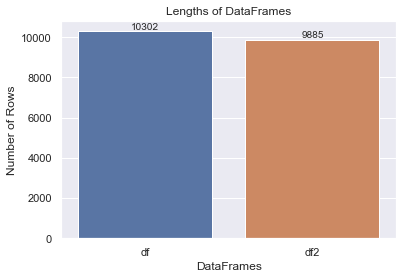

In [323]:
# Visualize lengths of df and df2 using Seaborn
ax = sns.barplot(x=['df', 'df2'], y=[len(df), len(df2)])
plt.xlabel('DataFrames')
plt.ylabel('Number of Rows')
plt.title('Lengths of DataFrames')

# Add numbers on top of bars
for bar in ax.containers:
    ax.bar_label(bar, label_type='edge', fontsize=10)
    
plt.show()

In [324]:
print('Before drop: %s' %df2.shape[0])
df2[subsets].drop_duplicates()
print('After drop: %s' %df2.shape[0])

Before drop: 9885
After drop: 9885


## Filter the condition


In [325]:
# df2 = df2.loc[df2['INCOME'] > 0]


In [326]:
df2 = df2.loc[(df2['AGE'] >= 25) & (df2['AGE'] < 70)]

In [327]:
# df2 = df2.loc[df2['CAR_USE'] == 'Private']

In [328]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9783 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9783 non-null   int64  
 1   KIDSDRIV    9783 non-null   int64  
 2   AGE         9783 non-null   float64
 3   HOMEKIDS    9783 non-null   int64  
 4   YOJ         9783 non-null   float64
 5   INCOME      9783 non-null   float64
 6   PARENT1     9783 non-null   object 
 7   HOME_VAL    9783 non-null   float64
 8   MSTATUS     9783 non-null   object 
 9   GENDER      9783 non-null   object 
 10  EDUCATION   9783 non-null   object 
 11  OCCUPATION  9783 non-null   object 
 12  TRAVTIME    9783 non-null   int64  
 13  CAR_USE     9783 non-null   object 
 14  BLUEBOOK    9783 non-null   int32  
 15  TIF         9783 non-null   int64  
 16  CAR_TYPE    9783 non-null   object 
 17  RED_CAR     9783 non-null   object 
 18  OLDCLAIM    9783 non-null   float64
 19  CLM_FREQ    9783 non-null 

## Exploratory Data Analysis

In [329]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY'],
      dtype='object')

### CLAIM_FLAG

([<matplotlib.axis.XTick at 0x25a0036bbb0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

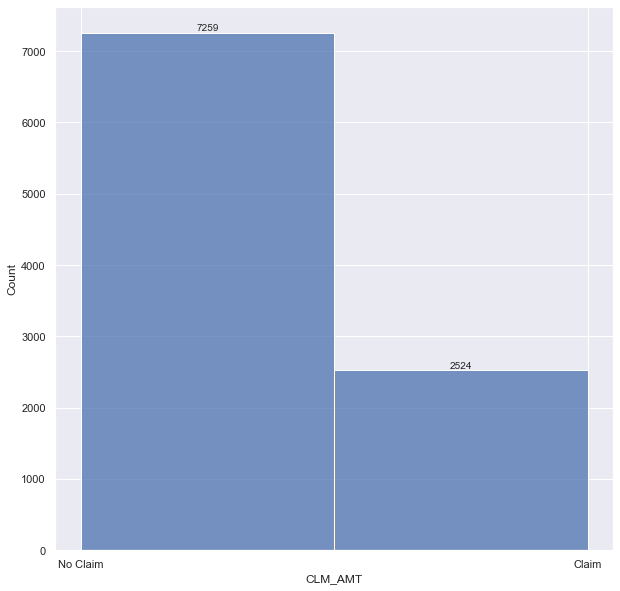

In [330]:
df2['CLM_AMT'].value_counts()

plt.figure(figsize=(10,10))

ax = sns.histplot(df2['CLM_AMT'], bins=2)


# Add value counts as annotations
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    text = f"{int(y)}"
    ax.text(x, y, text, ha='center', va='bottom')
    
# Set x-tick labels
plt.xticks([0, 1], ['No Claim', 'Claim'])


plt.xticks(np.arange(0,2,step=1))


### KIDSDRIV - Driving Children

In [331]:
df2['KIDSDRIV'].value_counts() # số lượng trẻ em trong độ tuổi thanh thiếu niên sử dụng xe

0    8613
1     758
2     337
3      72
4       3
Name: KIDSDRIV, dtype: int64

Age has the max value is 85 => the customer for this age has the challenge to drive car and the percentage of having accident in this age may be higher than other

<Figure size 720x720 with 0 Axes>

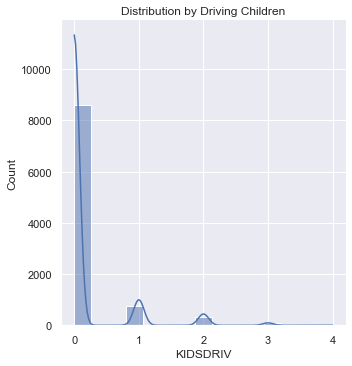

In [332]:
plt.figure(figsize=(10,10))

sns.displot(df2['KIDSDRIV'], kde=True)

plt.xticks(np.arange(0,5,step=1))

plt.title('Distribution by Driving Children')

plt.show()

The number of customer has children who use their car to drive almost in 0,1,2 teenager. Suppose that family who has children drive car will have more intention to use insurance.

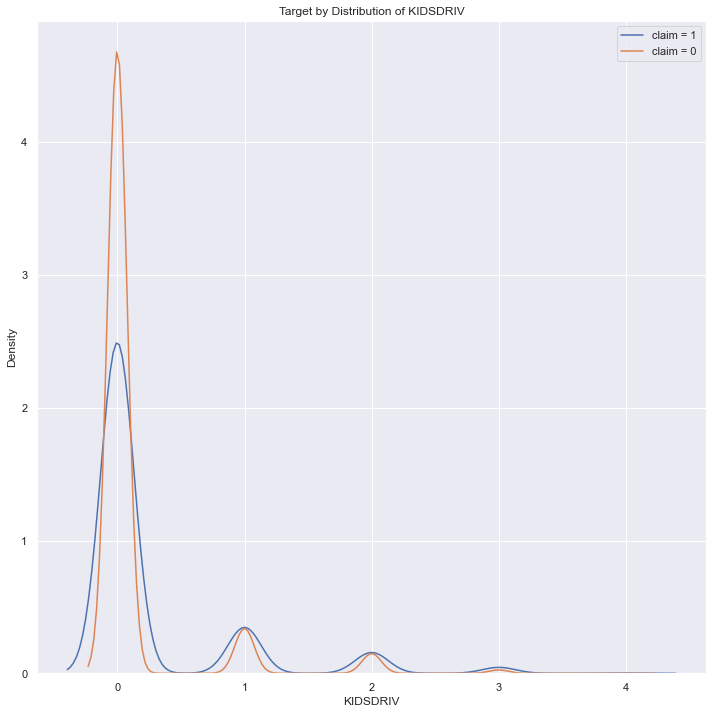

In [333]:
# Create distribution by driving children
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 1, 'KIDSDRIV'], label='claim = 1')

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 0, 'KIDSDRIV'], label='claim = 0')

plt.title('Target by Distribution of KIDSDRIV')
plt.xlabel('KIDSDRIV')
plt.ylabel('Density')
plt.legend()

In this graph we can clarify that customer who has children drive car (1,2,3) has the same amount using car insurance (the density of claim 1 and 0 is the same in the __KIDSDRIV__ value like 1,2,3)

On the other hand, when customer who has children don't use their car driving, the density of no buying insurance has more than 2 times who buying the car insurance.

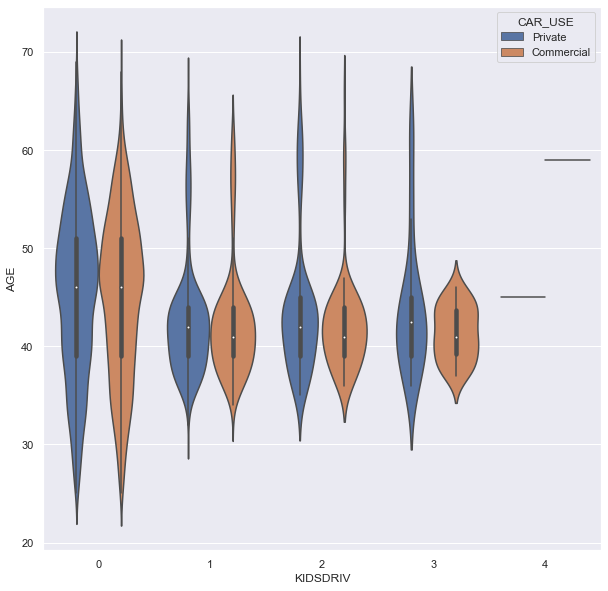

In [334]:
plt.figure(figsize=(10,10))

sns.violinplot(data=df2, y='AGE', x='KIDSDRIV', hue='CAR_USE')

plt.show()

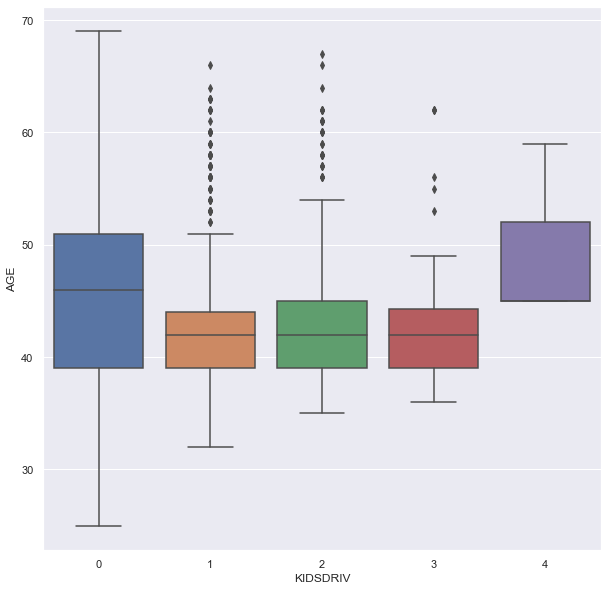

In [335]:
plt.figure(figsize=(10,10))

sns.boxplot(data=df2, y='AGE', x='KIDSDRIV')

plt.show()

Customers who have kids (teenagers) driving their cars is range from above 30 to about 50 years old


### Age

In [336]:
df2['AGE'].describe()

count    9783.000000
mean       45.023958
std         8.268061
min        25.000000
25%        39.000000
50%        45.000000
75%        51.000000
max        69.000000
Name: AGE, dtype: float64

In this description we see some outliers may not suit the law in some country. Example the min age is 16 (in Vietnam this age mustn't drive a car because they don't have a car licensed).

We also consider the max age when 81 should focus more analyse

Text(0.5, 1.0, 'Distribution by AGE')

<Figure size 720x720 with 0 Axes>

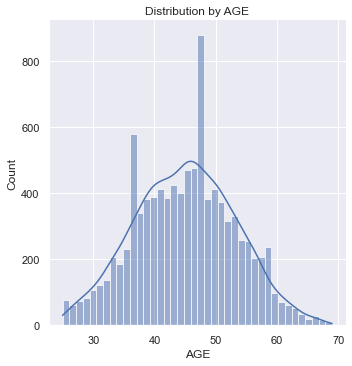

In [337]:
plt.figure(figsize=(10,10))

sns.displot(df2['AGE'], kde=True)

plt.title('Distribution by AGE')


In [338]:
print('The skewness of distribution: %s' %df2['AGE'].skew()) # lệch trái và khá ít => không dùng log được
print('The variance of distribution: %s' %df2['AGE'].var()) # variance khá lớn

The skewness of distribution: 0.023566397522490096
The variance of distribution: 68.36082857446624


In [339]:
# Create a bin to have a more vision in this age
df2['Age Group'] = pd.cut(df2['AGE'], bins=np.linspace(15,85,15))
df2['Age Group'].value_counts()

(45.0, 50.0]    2151
(40.0, 45.0]    2092
(35.0, 40.0]    1687
(50.0, 55.0]    1531
(30.0, 35.0]     884
(55.0, 60.0]     745
(25.0, 30.0]     371
(60.0, 65.0]     235
(65.0, 70.0]      56
(20.0, 25.0]      31
(15.0, 20.0]       0
(70.0, 75.0]       0
(75.0, 80.0]       0
(80.0, 85.0]       0
Name: Age Group, dtype: int64

We can see this distribution when age from 75 to 85 we can remove this age for ensure and the age must >= 18

In [340]:
# Create a new table
age_table = df2[['AGE', 'Age Group','CLM_AMT']]
age_table

AGE     Age Group  CLM_AMT
0      60.0  (55.0, 60.0]      0.0
1      43.0  (40.0, 45.0]      0.0
2      48.0  (45.0, 50.0]      0.0
4      51.0  (50.0, 55.0]      0.0
5      50.0  (45.0, 50.0]      0.0
...     ...           ...      ...
10297  45.0  (40.0, 45.0]      0.0
10298  46.0  (45.0, 50.0]      0.0
10299  48.0  (45.0, 50.0]      0.0
10300  50.0  (45.0, 50.0]      0.0
10301  52.0  (50.0, 55.0]      0.0

[9783 rows x 3 columns]

In [341]:
# Group by
age_group = age_table.groupby('Age Group').mean().sort_values('CLM_AMT', ascending=False)
age_group

AGE   CLM_AMT
Age Group                        
(20.0, 25.0]  25.000000  0.741935
(25.0, 30.0]  28.404313  0.396226
(30.0, 35.0]  33.304809  0.337104
(35.0, 40.0]  38.173468  0.310018
(60.0, 65.0]  62.442553  0.306383
(55.0, 60.0]  57.578523  0.296644
(40.0, 45.0]  43.062080  0.250000
(65.0, 70.0]  66.750000  0.214286
(45.0, 50.0]  47.916511  0.194793
(50.0, 55.0]  52.811234  0.186806
(15.0, 20.0]        NaN       NaN
(70.0, 75.0]        NaN       NaN
(75.0, 80.0]        NaN       NaN
(80.0, 85.0]        NaN       NaN

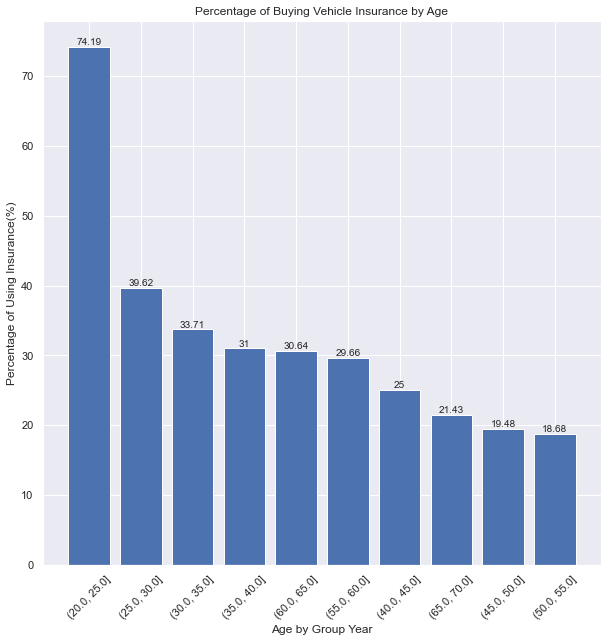

In [342]:
# Create percentage
fig, ax = plt.subplots(figsize=(10,10))

bar_age = plt.bar(age_group.index.astype(str), round(100 * age_group['CLM_AMT'],2))

plt.xticks(rotation=45)
plt.xlabel('Age by Group Year')
plt.ylabel('Percentage of Using Insurance(%)')

plt.title('Percentage of Buying Vehicle Insurance by Age')

ax.bar_label(bar_age)

plt.show(bar_age)

`Information`:
- First, in this chart and chart before, I will remove the age > 80 because this age group just has 1 observaition => small  percentage in this dataset.
- Second, reference in Vietnamese law, people who under 18 don't have car licensed so I will remove who has under 18.

- This age has more intention to use car insurance spread in younger or older age (from 15-25 or 70-75) in percentage


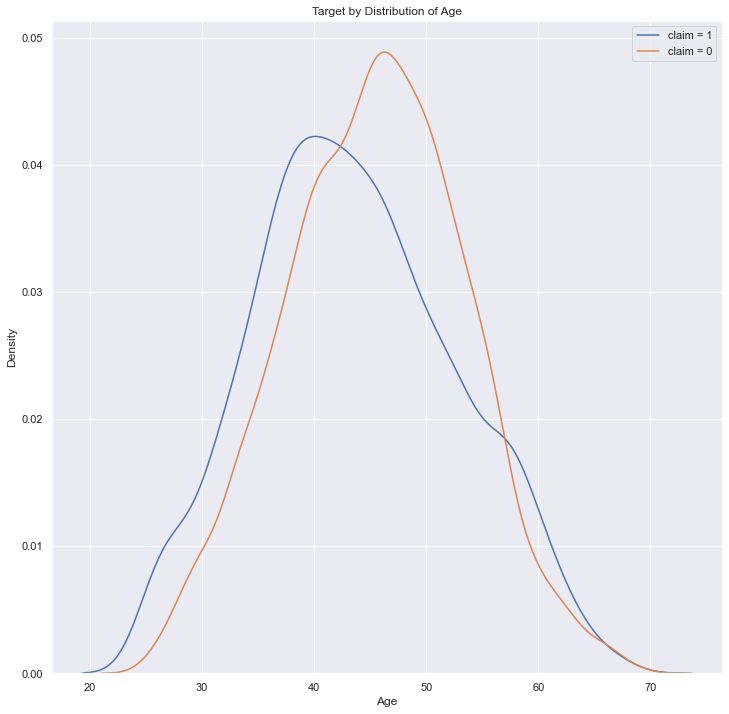

In [343]:
# Create distribution by age
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 1, 'AGE'], label='claim = 1')

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 0, 'AGE'], label='claim = 0')

plt.title('Target by Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

As the kde plot we can see something

1. Age group has buy car insurance more about 30-50 + age group has largest observations

### Income - Home value - claim flag

In this phase, we will clarify the relations the income and home value and we will figure out the assumption like:

1. Will the income has the positive effect to claim flag

2. Will customer who has house (home value >0) has intention to buy car insurance or vice versa

Text(0.5, 1.0, 'Relationship between Home Value and Income')

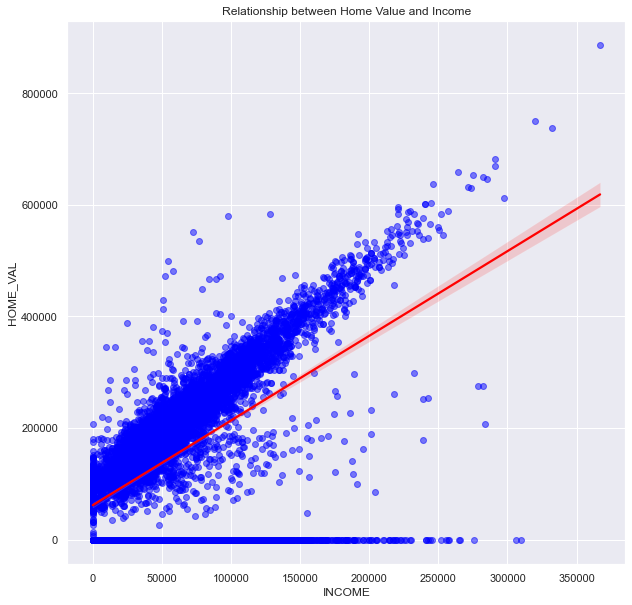

In [344]:
plt.figure(figsize=(10,10))

sns.regplot(data=df2, x="INCOME", y='HOME_VAL',
            scatter_kws={'color':'blue', 'alpha':0.5},
            line_kws={'color':'red'})

plt.title('Relationship between Home Value and Income')


In [345]:
plt.figure(figsize=(10,10))

fig = px.scatter(df2, x="INCOME", y="HOME_VAL", color="GENDER", facet_col="GENDER",
                trendline="ols", title="Relationship with Income and Home Value")

fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()

<Figure size 720x720 with 0 Axes>

Except customer who doesn't own house, the relationship about __INCOME__ and __HOME VALUE__ are positive.

In gender it still remain the positive relationship in both, so we can conclude that the relationship between income and home value is still positive in both gender.

And now, we want to figure out more than detail about home value and claim flag and income relationship, with customer who doesn't has a home (home value equals 0) compare with who has - who has more intention to buy car insurance. 

Next, with the higher income, may have a higher percentage to buy a car_insurance, or which range of income who has buy most.



In [346]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [347]:
df_home_value = df2[['HOME_VAL', 'INCOME', 'CLM_AMT']]

df_home_check = df2[['HOME_VAL','INCOME']]

df_home_scale = scaler.fit_transform(df_home_check)
df_home_scale = pd.DataFrame(df_home_scale, columns=df_home_check.columns)
df_home_scale.head()

HOME_VAL    INCOME
0  0.000000  0.183497
1  0.290588  0.249159
2  0.000000  0.144078
3  0.345936  0.156958
4  0.275534  0.313288

In [348]:
df_home_value['HOME_VAL'] = df_home_scale['HOME_VAL']
df_home_value['INCOME'] = df_home_scale['INCOME']

Percentage of who doesn't has a house is round 28% (Customer who doesn't own a house may be a travelers or who a work in transit a lot, ...)

So we need to figure out in these kind of customers 

In [349]:
print(df2[['INCOME','HOME_VAL']].describe())

              INCOME       HOME_VAL
count    9783.000000    9783.000000
mean    61989.927621  155704.593807
std     46664.944722  126668.285797
min         0.000000       0.000000
25%     29026.500000       0.000000
50%     54419.423427  160542.000000
75%     85486.500000  236722.000000
max    367030.000000  885282.000000


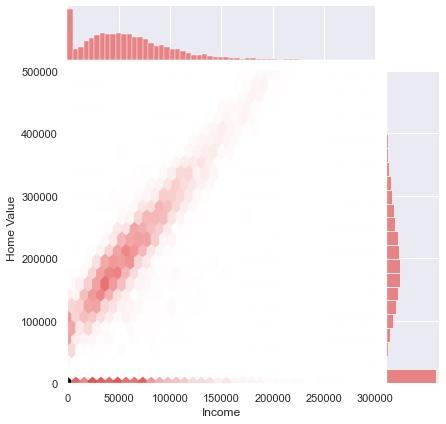

In [350]:
## hexbin plot
sns.jointplot(df2['INCOME'], df2['HOME_VAL'], kind="hex", color="#E76161")

plt.xlim(0,300000)
plt.ylim(0,500000)

plt.xlabel('Income')
plt.ylabel('Home Value')

plt.show()

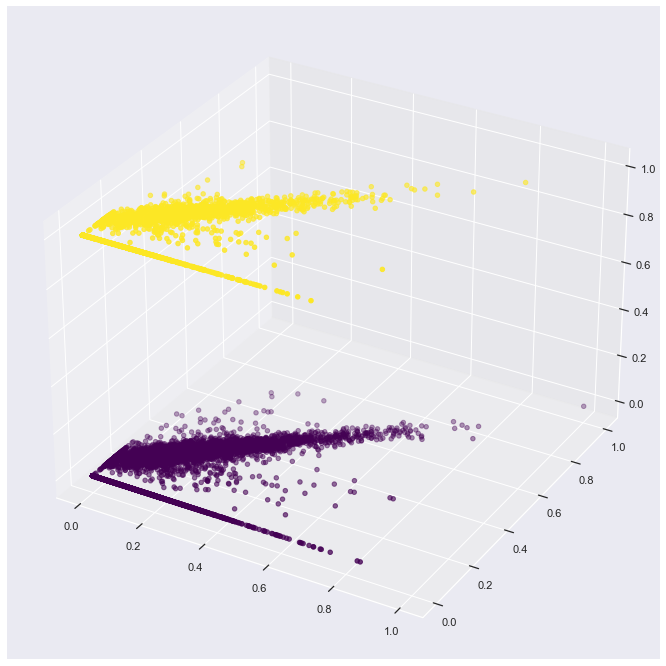

In [351]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

ax.scatter(df_home_value['INCOME'], df_home_value['HOME_VAL'],\
            df_home_value['CLM_AMT'], c=df_home_value['CLM_AMT'], cmap='viridis')

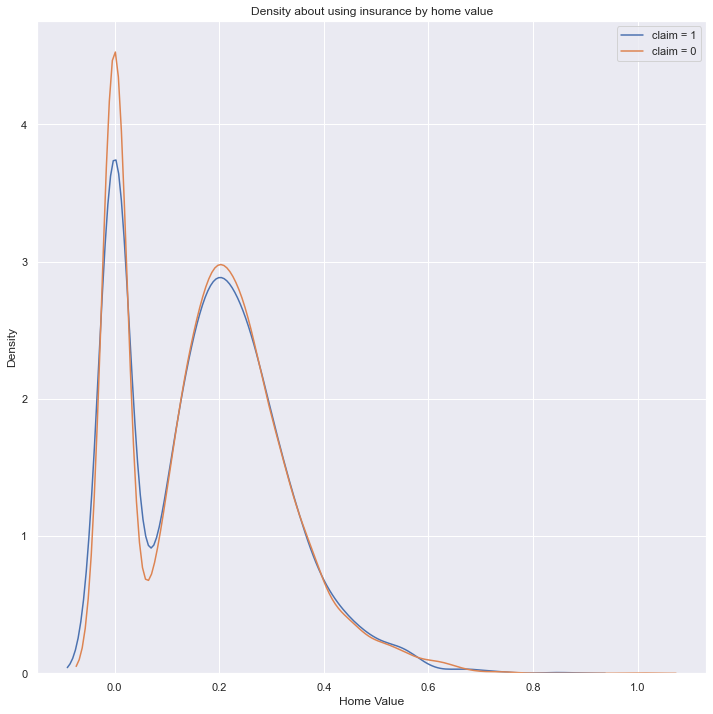

In [352]:
# Create distribution by age
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df_home_value.loc[df_home_value['CLM_AMT'] == 1, 'HOME_VAL'], label='claim = 1')

sns.kdeplot(df_home_value.loc[df_home_value['CLM_AMT'] == 0, 'HOME_VAL'], label='claim = 0')

plt.title('Density about using insurance by home value')

plt.xlabel('Home Value')
plt.ylabel('Density')
plt.legend()

Customer who doesn't has a house has more intention to buy car insurance.

Customer who doesn't has income, we can give 2 assumptions

1. Value in this dataset has a mistakes

2. They actually are in unemployment. However this actually has some problem when we find out in some detail, like why they also buy car insurance, how long are they in unemployment, because some of them also have kids, previous claim or buying car insurance. Analyze them may face the challenge make the model prediction not true. So we need to clarify should we keep this kind of customer or remove them.

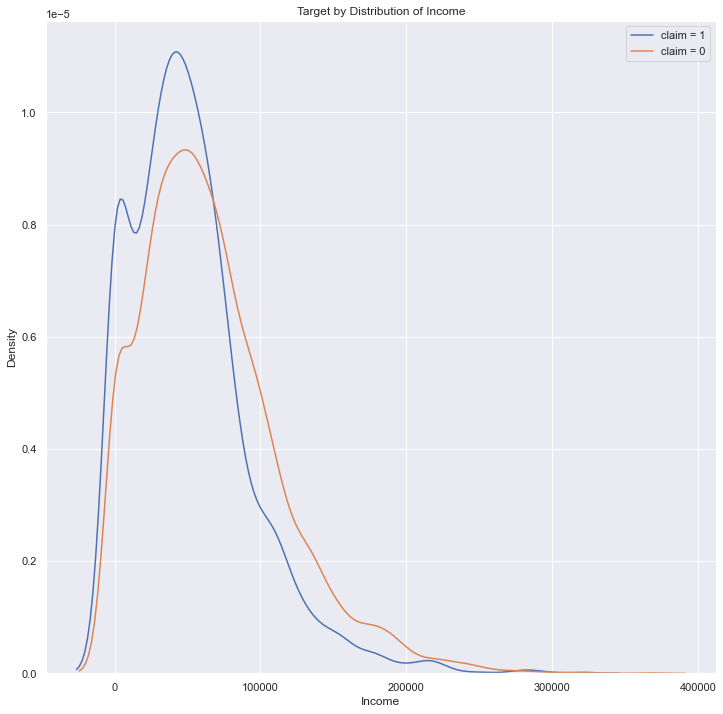

In [353]:
# Create distribution by income
plt.figure(figsize=(12,12))

# Draw a kde for distribution income and response

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 1, 'INCOME'], label='claim = 1')

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 0, 'INCOME'], label='claim = 0')

plt.title('Target by Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

### Claim Frequence and Time to work



In [354]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

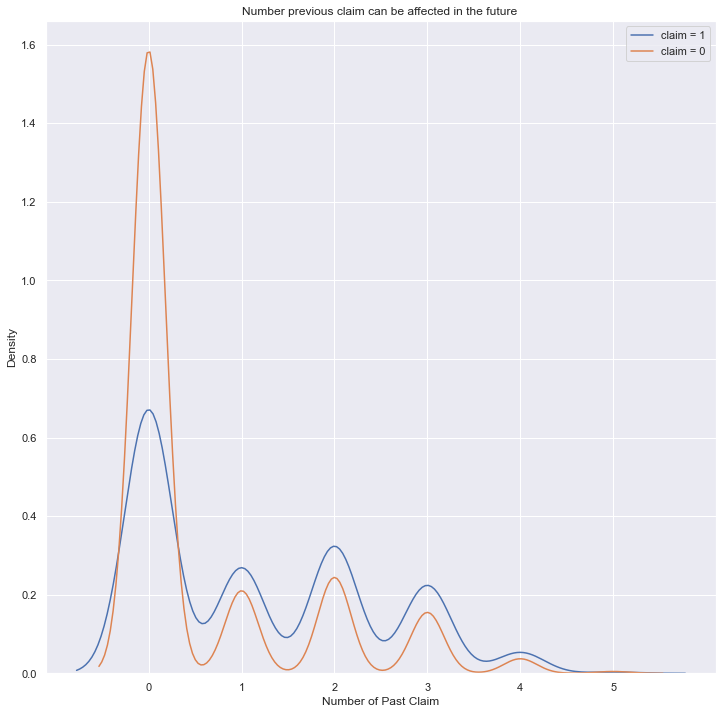

In [355]:
# Create distribution by age
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 1, 'CLM_FREQ'], label='claim = 1')

sns.kdeplot(df2.loc[df2['CLM_AMT'] == 0, 'CLM_FREQ'], label='claim = 0')

plt.title('Number previous claim can be affected in the future ')

plt.xticks(np.arange(0,6,step=1))
plt.xlabel('Number of Past Claim')
plt.ylabel('Density')
plt.legend()

Customer who has at least 1 claim in the past has a higher intention to using car insurance in the future

In [356]:
fig = px.box(df2, x='CLM_FREQ', y='TRAVTIME', color='GENDER', title='Box Plot about Time to work with total claim in past by gender')


fig.show()

In this graph, the difference between number of previous frequence and time to work not slightly difference so time to work doesn't effect on itention using car insurance by gender

### Types of cars and claim

In [357]:
car_type = df2["CAR_TYPE"].value_counts()


In [358]:
#print(temp.values)
car_type_y0 = []
car_type_y1 = []
for val in car_type.index:
    car_type_y1.append(np.sum(df2["CLM_AMT"][df2["CAR_TYPE"]==val] == 1))
    car_type_y0.append(np.sum(df2["CLM_AMT"][df2["CAR_TYPE"]==val] == 0))     
trace1 = go.Bar(
    x = car_type.index,
    y = (car_type_y1 / car_type.sum()) * 100,
    name='YES',
    marker=dict(
        color=(car_type_y1/ car_type.sum())*100,
        colorscale = 'GREENS',
        reversescale = False)
)
trace2 = go.Bar(
    x = car_type.index,
    y = (car_type_y0 / car_type.sum()) * 100, 
    name='NO',
    marker=dict(
        color=(car_type_y0/ car_type.sum())*100,
        colorscale = 'REDS',
        reversescale = False)
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which types of car higher applicant's applied for insurance in terms of insurance used or not %",
    #barmode='stack',
    width = 900,
    xaxis=dict(
        title='types of cars',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

We can give some conclude with this graph:

1. Customer who used SUV is the highest percentage using car insurance in the future.

2. Customer who used Minivan is the highest percentage not using car insurance in the future

3. Compare in each types of car, customer used __pickup type__ or __sport car__ or __SUV__ may have more intention to use insurance (1/2 compare who don't use in each type).

### Car Age / Income / Claim / OCCUPATION

In [359]:
plt.figure(figsize=(20,20))

fig = px.scatter(df2, x='CAR_AGE', y='INCOME', color='CLM_AMT', trendline='ols',
                height=600, width=1000)

fig.show()

<Figure size 1440x1440 with 0 Axes>

In [360]:
job = df2["OCCUPATION"].value_counts()
#print(temp.values)
job_y0 = []
job_y1 = []
for val in job.index:
    job_y1.append(np.sum(df2["CLM_AMT"][df2["OCCUPATION"]==val] == 1))
    job_y0.append(np.sum(df2["CLM_AMT"][df2["OCCUPATION"]==val] == 0))     
trace1 = go.Bar(
    x = job.index,
    y = (job_y1 / job.sum()) * 100,
    name='YES',
    marker=dict(
        color=(job_y1/ job.sum())*100,
        colorscale = 'GREENS',
        reversescale = False)
)
trace2 = go.Bar(
    x = job.index,
    y = (job_y0 / job.sum()) * 100, 
    name='NO',
    marker=dict(
        color=(job_y0/ job.sum())*100,
        colorscale = 'REDS',
        reversescale = False)
)

data = [trace1, trace2]
layout = go.Layout(
    title = "For which jobs - applicant's applied for insurance in terms of insurance used or not %",
    #barmode='stack',
    width = 900,
    xaxis=dict(
        title='types of jobs',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
fig.show()

### Revoked

<Figure size 864x864 with 0 Axes>

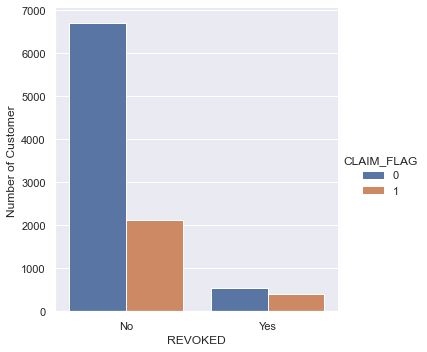

In [361]:
plt.figure(figsize=(12,12))

revoke = sns.catplot(data = df2 ,x='REVOKED', hue='CLAIM_FLAG', kind='count', ax=ax)

plt.ylabel('Number of Customer')

plt.show()

### BLUEBOOK

In [362]:
fig = px.box(df2, x='OCCUPATION', y='BLUEBOOK', color='CLAIM_FLAG', \
             title='Box Plot about the value of car in each occupation')


fig.show()

In [363]:
fig = px.box(df2, x='CAR_TYPE', y='BLUEBOOK', color='CLAIM_FLAG', \
             title='Box Plot about the value of car in each occupation')


fig.show()

## Feature Engineering

In [364]:
category

['PARENT1',
 'MSTATUS',
 'GENDER',
 'EDUCATION',
 'OCCUPATION',
 'CAR_USE',
 'CAR_TYPE',
 'RED_CAR',
 'REVOKED',
 'URBANICITY']

In [365]:
df2.select_dtypes('float')

AGE       YOJ        INCOME  HOME_VAL  OLDCLAIM  CLM_AMT  CAR_AGE
0      60.0  11.00000   67349.00000       0.0    4461.0      0.0     18.0
1      43.0  11.00000   91449.00000  257252.0       0.0      0.0      1.0
2      48.0  11.00000   52881.00000       0.0       0.0      0.0     10.0
4      51.0  14.00000   57608.24609  306251.0       0.0      0.0      6.0
5      50.0  11.30455  114986.00000  243925.0   19217.0      0.0     17.0
...     ...       ...           ...       ...       ...      ...      ...
10297  45.0   9.00000  164669.00000  386273.0       0.0      0.0     17.0
10298  46.0   9.00000  107204.00000  332591.0       0.0      0.0      1.0
10299  48.0  15.00000   39837.00000  170611.0       0.0      0.0      1.0
10300  50.0   7.00000   43445.00000  149248.0       0.0      0.0     11.0
10301  52.0  11.00000   53235.00000  197017.0       0.0      0.0      9.0

[9783 rows x 7 columns]

In [366]:
df2['PARENT1'].value_counts()

No     8551
Yes    1232
Name: PARENT1, dtype: int64

In [367]:
df2['PARENT1'] = df2['PARENT1'].map({'No':0, 'Yes':1}).astype(int)
df2['MSTATUS'] = df2['MSTATUS'].map({'No':0, 'Yes':1}).astype(int)
df2['GENDER'] = df2['GENDER'].map({'M':1, 'F':0}).astype(int)
df2['CAR_USE'] = df2['CAR_USE'].map({'Private':1, 'Commercial':0}).astype(int)
df2['RED_CAR'] = df2['RED_CAR'].map({'no':0, 'yes':1}).astype(int)
df2['REVOKED'] = df2['REVOKED'].map({'No':0, 'Yes':1}).astype(int)
df2['URBANICITY'] = df2['URBANICITY'].map({'Urban':1, 'Rural':0}).astype(int)

In [368]:
df2.drop('Age Group', axis=1, inplace=True)

In [369]:
df2['AGE'] = df2['AGE'].astype(int)
df2['YOJ'] = df2['YOJ'].astype(int)
df2['INCOME'] = df2['INCOME'].astype(int)
df2['HOME_VAL'] = df2['HOME_VAL'].astype(int)
df2['OLDCLAIM'] = df2['OLDCLAIM'].astype(int)
df2['CLM_AMT'] = df2['CLM_AMT'].astype(int)
df2['CAR_AGE'] = df2['CAR_AGE'].astype(int)

[0.02524132 0.08530529 0.03642762 0.0737126  0.08748359 0.01719664
 0.07623772 0.01800734 0.02247316 0.08609022 0.02973933 0.08913464
 0.02157985 0.05557821 0.05205768 0.0208189  0.07498354 0.07479236
 0.05314001]


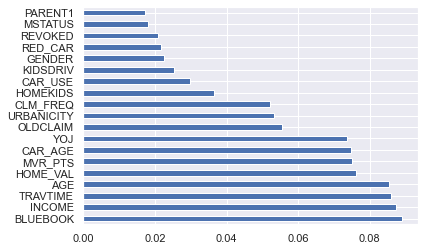

In [370]:
def decisiontree(table,col):
    # x_1 = table[[col for col in table.columns if col not in ['ID','CLM_AMT','CLAIM_FLAG']]]
    x_1 = table.loc[:,['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','PARENT1','HOME_VAL','MSTATUS','GENDER',
                   'TRAVTIME','CAR_USE','BLUEBOOK','RED_CAR','OLDCLAIM','CLM_FREQ','REVOKED','MVR_PTS','CAR_AGE',
                   'URBANICITY']]
    y_1 = table.loc[:,col]

    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()

    model.fit(x_1,y_1)

    print(model.feature_importances_)
    feat_importances = pd.Series(model.feature_importances_, index=x_1.columns)
    feat_importances.nlargest(30).plot(kind='barh')
    plt.show()



decisiontree(df2,"CLM_AMT")

In [371]:
# Using one-hot encoding to change the value of 3 columns has 3 or more unique values
for i in ['EDUCATION', 'CAR_TYPE','OCCUPATION']:
    onehots = pd.get_dummies(df2[i],prefix=i)
    df2=df2.join(onehots)



In [372]:
df2 = df2.drop(columns=['EDUCATION', 'CAR_TYPE','OCCUPATION'])

<Figure size 720x720 with 0 Axes>

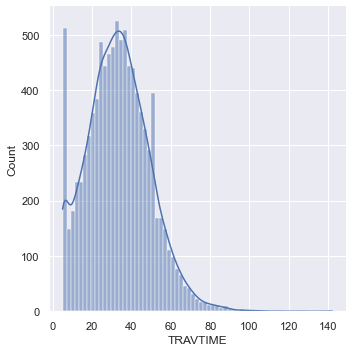

<Figure size 720x720 with 0 Axes>

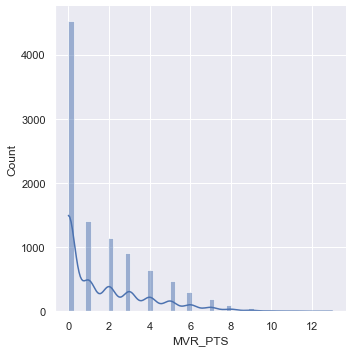

<Figure size 720x720 with 0 Axes>

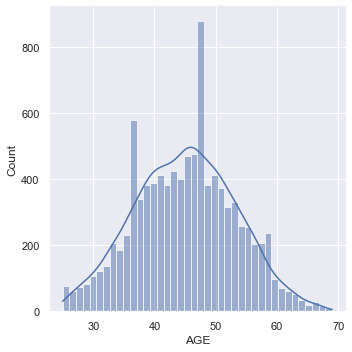

<Figure size 720x720 with 0 Axes>

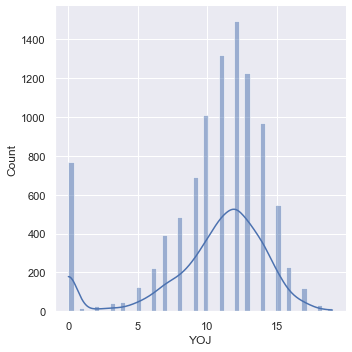

<Figure size 720x720 with 0 Axes>

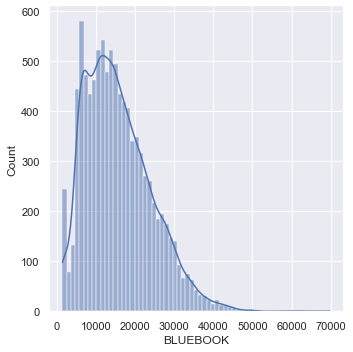

<Figure size 720x720 with 0 Axes>

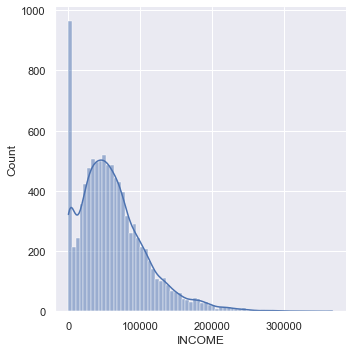

<Figure size 720x720 with 0 Axes>

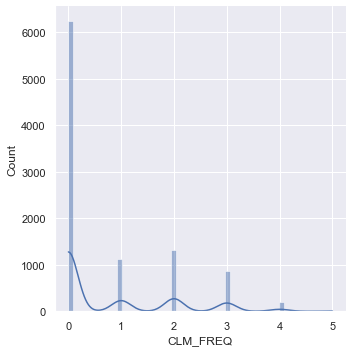

<Figure size 720x720 with 0 Axes>

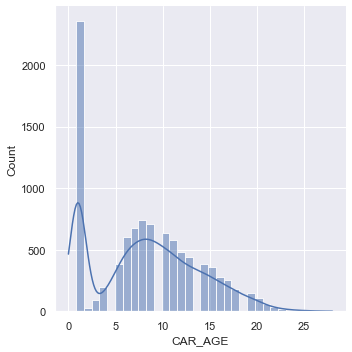

<Figure size 720x720 with 0 Axes>

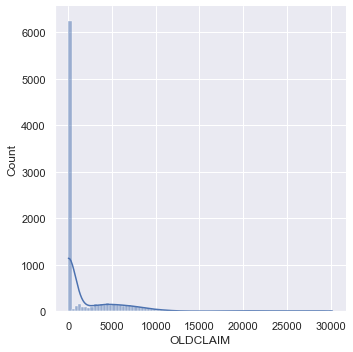

<Figure size 720x720 with 0 Axes>

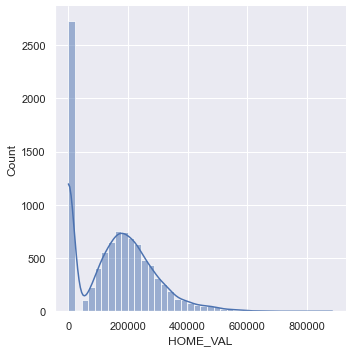

In [373]:
for i in ['TRAVTIME','MVR_PTS','AGE','YOJ','BLUEBOOK','INCOME','CLM_FREQ','CAR_AGE','OLDCLAIM','HOME_VAL']:
    col_name = df2[i]

    plt.figure(figsize=(10,10))

    sns.displot(col_name, kde=True)

    plt.show()

    

### Split Dataset

In [374]:
correlation_2 = df2.corr()

<AxesSubplot:>

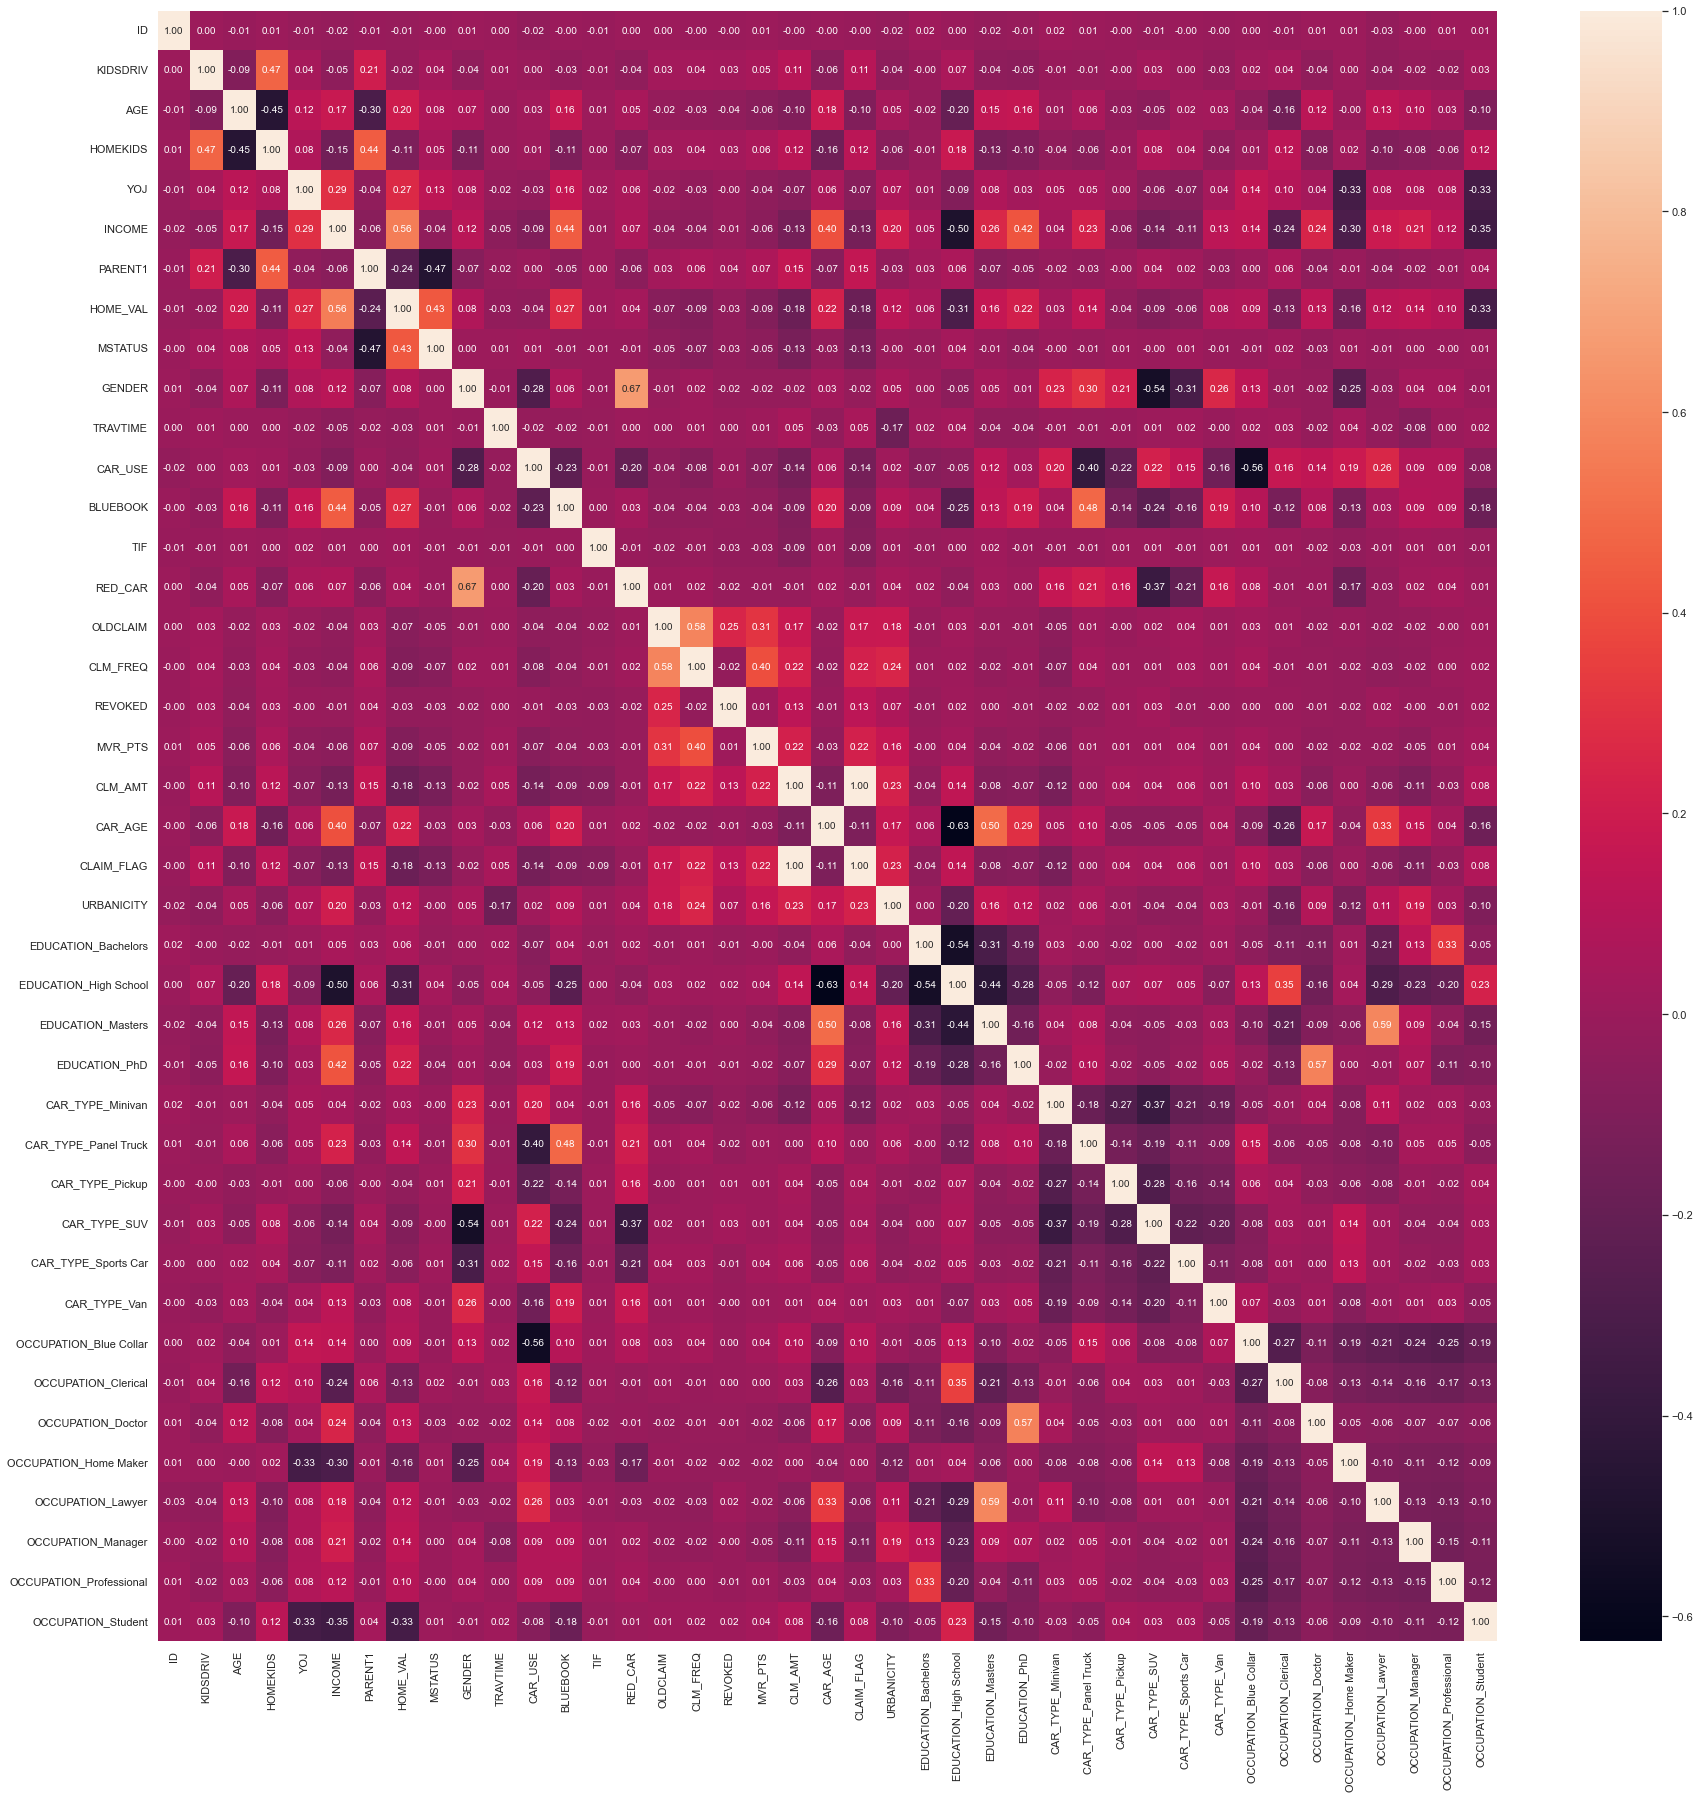

In [375]:
plt.figure(figsize=(30,30))

sns.heatmap(correlation_2, annot=True, fmt=".2f")

In [376]:
x = df2[['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL',
                   'TRAVTIME','CAR_USE','BLUEBOOK','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE',
                  'URBANICITY']]
# B1: Bỏ parent1
# B2: Bỏ MSTATUS
# B3: Bỏ REVOKED
# B4: Bỏ RED_CAR
# B5: Bỏ GENDER
# B6: Bỏ KIDSDRIV
# x = df2[['TRAVTIME','MVR_PTS','AGE','YOJ','BLUEBOOK','INCOME','CLM_FREQ','CAR_AGE','OLDCLAIM','HOME_VAL']]
# x = df2[['TRAVTIME','AGE','BLUEBOOK','INCOME','MVR_PTS','HOME_VAL']]
y = df2['CLAIM_FLAG']

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [379]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test.value_counts()

(6848, 14)
(2935, 14)
(6848,)
(2935,)


0    2200
1     735
Name: CLAIM_FLAG, dtype: int64

## Handling Imbalance Dataset

In [380]:
# !pip install -U imbalanced-learn

In [381]:
x_train.select_dtypes('category')

Empty DataFrame
Columns: []
Index: [4742, 1949, 4130, 8663, 1378, 8578, 1878, 267, 8306, 6644, 5141, 200, 9859, 7993, 9822, 1249, 6111, 6554, 1238, 7530, 8703, 3786, 2090, 3273, 9296, 3996, 4550, 9781, 8162, 8503, 9155, 9023, 2203, 9329, 2238, 1440, 7375, 6609, 2804, 9101, 2068, 3319, 976, 3592, 2159, 5264, 8092, 10211, 3119, 8828, 3333, 2966, 2631, 9172, 7292, 8799, 6726, 4379, 7092, 9143, 8682, 3206, 7867, 943, 1645, 9207, 9319, 6137, 4864, 6181, 593, 4533, 6290, 6243, 4649, 8806, 1244, 5300, 9377, 2033, 6443, 1376, 6971, 4511, 9875, 303, 4178, 2627, 4243, 9530, 8365, 955, 259, 9105, 4401, 2661, 3220, 6827, 6735, 910, ...]

[6848 rows x 0 columns]

In [382]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

In [383]:
# adasyn = ADASYN()
# x_train_smt, y_train_smt = adasyn.fit_resample(x_train,y_train)

In [384]:

from imblearn import over_sampling

x_train_smt, y_train_smt = over_sampling.SMOTE(random_state=2).fit_resample(x_train, y_train)


In [385]:
x.select_dtypes('float')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...]

[9783 rows x 0 columns]

In [386]:
# Before Oversampling
print('Target before oversampling:')
print(pd.Series(y_train).value_counts())

Target before oversampling:
0    5059
1    1789
Name: CLAIM_FLAG, dtype: int64


In [387]:
# Setelah Oversampling
print('Target after oversampling:')
print(pd.Series(y_train_smt).value_counts())

Target after oversampling:
1    5059
0    5059
Name: CLAIM_FLAG, dtype: int64


In [388]:
x_train_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10118 entries, 0 to 10117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   KIDSDRIV    10118 non-null  int64
 1   AGE         10118 non-null  int32
 2   HOMEKIDS    10118 non-null  int64
 3   YOJ         10118 non-null  int32
 4   INCOME      10118 non-null  int32
 5   HOME_VAL    10118 non-null  int32
 6   TRAVTIME    10118 non-null  int64
 7   CAR_USE     10118 non-null  int32
 8   BLUEBOOK    10118 non-null  int32
 9   OLDCLAIM    10118 non-null  int32
 10  CLM_FREQ    10118 non-null  int64
 11  MVR_PTS     10118 non-null  int64
 12  CAR_AGE     10118 non-null  int32
 13  URBANICITY  10118 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 751.1 KB


## MODEL TRAINING

In [389]:
# Model Evaluation Classification test
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_smt)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_smt)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:",round(precision_score(y_test, y_pred),3))
    print("Recall: ",round(recall_score(y_test, y_pred),3))
    print("F1-Score: ",round(f1_score(y_test, y_pred),3))  
    score = cross_validate(model, x, y, cv=10, scoring='roc_auc', return_train_score=True)


### Logistic Regression


In [390]:
model1 = LogisticRegression(random_state=2, solver='newton-cg', class_weight={0:0.285,1:0.715})
model1.fit(x_train, y_train)
eval_classification(model1)

Accuracy:  0.721
Precision: 0.462
Recall:  0.702
F1-Score:  0.557


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.366")

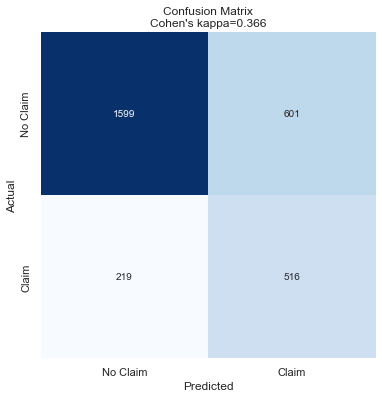

In [391]:
# Get model predictions
y_pred = model1.predict(x_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate cohen kappa
kappa1 = cohen_kappa_score(y_test, y_pred)

# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa1))


### Decision Tree

In [392]:
# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(random_state=2)
model2.fit(x_train_smt, y_train_smt)
eval_classification(model2)

Accuracy:  0.675
Precision: 0.387
Recall:  0.507
F1-Score:  0.439


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.216")

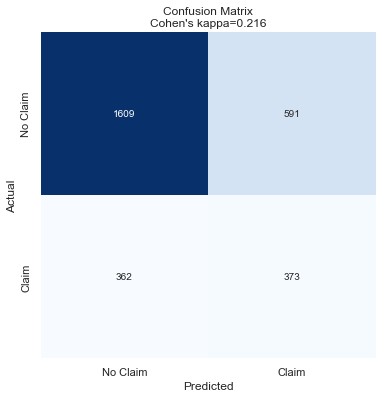

In [393]:
# Get model predictions
y_pred = model2.predict(x_test)

# Calculate confusion matrix
cm_1 = confusion_matrix(y_test, y_pred)

kappa2 = cohen_kappa_score(y_test, y_pred)
# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa2))

### XGBOOST

In [394]:
# !pip install xgboost

In [395]:
import xgboost as xgb
from xgboost import XGBClassifier

model3 = xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1, max_depth = 6, learning_rate=0.015,subsample=0.9, min_child_weight=3,objective='binary:logistic')
model3.fit(x_train_smt, y_train_smt)
eval_classification(model3)

Accuracy:  0.734
Precision: 0.478
Recall:  0.653
F1-Score:  0.552


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.369")

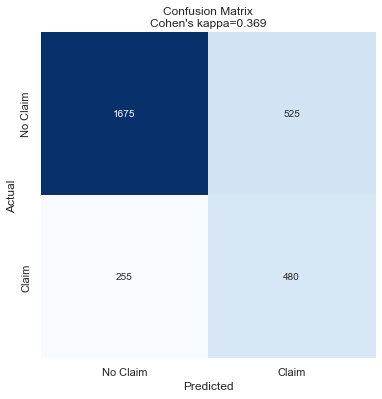

In [396]:
# Get model predictions
y_pred = model3.predict(x_test)

# Calculate confusion matrix
cm_3 = confusion_matrix(y_test, y_pred)

kappa3 = cohen_kappa_score(y_test, y_pred)
# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa3))

### Random Forest

In [397]:
from sklearn.ensemble import RandomForestClassifier

In [398]:
model4 = RandomForestClassifier(random_state=2, criterion='entropy', n_estimators=100,\
                                max_features='auto', max_depth=10)
model4.fit(x_train_smt, y_train_smt)
eval_classification(model4)

Accuracy:  0.738
Precision: 0.482
Recall:  0.626
F1-Score:  0.545


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.365")

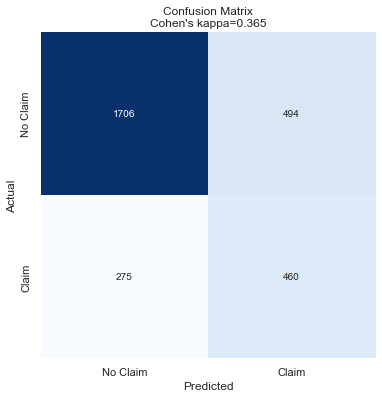

In [399]:
# Get model predictions
y_pred = model4.predict(x_test)

# Calculate confusion matrix
cm_4 = confusion_matrix(y_test, y_pred)


kappa4 = cohen_kappa_score(y_test, y_pred)
# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa4))

### ADABOOST CLASSIFIER

In [400]:
from sklearn.ensemble import AdaBoostClassifier

In [401]:
model5 = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=0)
model5.fit(x_train_smt, y_train_smt)
eval_classification(model5)

Accuracy:  0.723
Precision: 0.461
Recall:  0.611
F1-Score:  0.525


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.335")

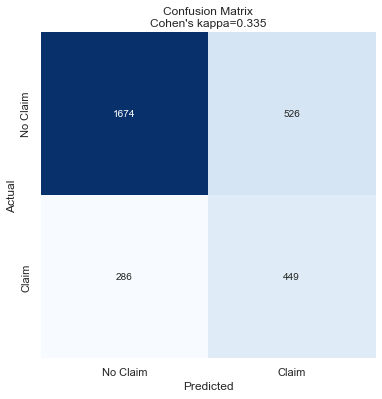

In [402]:
# Get model predictions
y_pred = model5.predict(x_test)

# Calculate confusion matrix
cm_5 = confusion_matrix(y_test, y_pred)


kappa5 = cohen_kappa_score(y_test, y_pred)
# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_5, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa5))

### Gradient Boosting

In [403]:
model6 = GradientBoostingClassifier()
model6.fit(x_train_smt, y_train_smt)

eval_classification(model6)

Accuracy:  0.726
Precision: 0.465
Recall:  0.619
F1-Score:  0.531


Text(0.5, 1.0, "Confusion Matrix\nCohen's kappa=0.343")

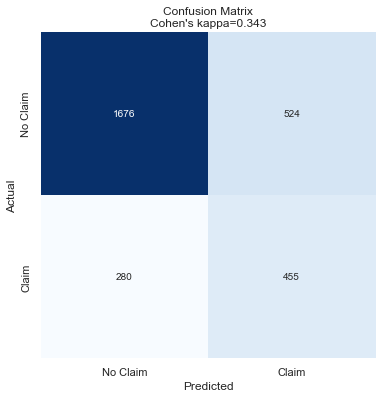

In [404]:
# Get model predictions
y_pred = model6.predict(x_test)

# Calculate confusion matrix
cm_6 = confusion_matrix(y_test, y_pred)


kappa6 = cohen_kappa_score(y_test, y_pred)
# Plot confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm_6, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'], ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix\nCohen\'s kappa={:.3f}'.format(kappa6))

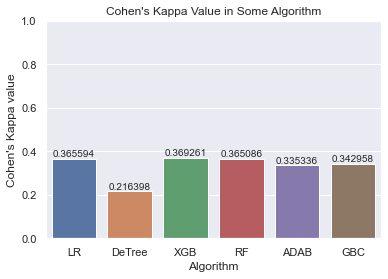

In [405]:
fig, ax = plt.subplots()

ax = sns.barplot(x=['LR', 'DeTree', 'XGB', 'RF', 'ADAB', 'GBC'], y=[kappa1, kappa2, kappa3, kappa4, kappa5, kappa6], ax=ax)

# Name for axis
plt.xlabel('Algorithm')
plt.ylabel("Cohen's Kappa value" )
plt.title("Cohen's Kappa Value in Some Algorithm")

# Set some feature 
plt.ylim(0,1)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

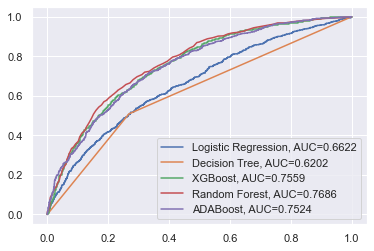

In [406]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model1 = LogisticRegression(random_state=5)
model1.fit(x_train, y_train)
y_pred = model1.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(random_state=5)
model2.fit(x_train_smt, y_train_smt)
y_pred = model2.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#
from xgboost import XGBClassifier

model3 = XGBClassifier(random_state=2)
model3.fit(x_train_smt, y_train_smt)
y_pred = model3.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

model4 = RandomForestClassifier(random_state=2)
model4.fit(x_train_smt, y_train_smt)
y_pred = model4.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

model5 = AdaBoostClassifier(random_state=2)
model5.fit(x_train_smt, y_train_smt)
y_pred = model5.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="ADABoost, AUC="+str(auc))

plt.legend()


## SVM

In [407]:
from sklearn import svm

In [408]:
'''
model6 = svm.SVC(kernel='linear', C=1, gamma=0)
model6.fit(x_train_smt, y_train_smt)
eval_classification(model6)
'''

"\nmodel6 = svm.SVC(kernel='linear', C=1, gamma=0)\nmodel6.fit(x_train_smt, y_train_smt)\neval_classification(model6)\n"

In [409]:
'''
model_k = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 10)
model_k.fit(x_train,y_train)

model_k.best_score_
model_k.best_params_
eval_classification(model_k)
'''

"\nmodel_k = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 10)\nmodel_k.fit(x_train,y_train)\n\nmodel_k.best_score_\nmodel_k.best_params_\neval_classification(model_k)\n"

In [410]:
'''
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold
weights = np.linspace(0.0,1.0,50)

#grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}
        
# function for class weight tuning
def class_weight_tuning(clf):
    global param_grid
    gridsearch = GridSearchCV(estimator= clf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train_smt, y_train_smt)
    weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
    weight = weigh_data['weight'].iloc[weigh_data['score'].idxmax()]
    class_weight={0:1-weight,1:weight}
    return class_weight
def training_with_kfold(clf, params):
    class_weight = class_weight_tuning(clf(**params))
    params["class_weight"] = class_weight
    kfold = model_selection.KFold(n_splits=10)
    modelCV = clf(**params)
    scoring = ["accuracy", "precision", "recall"]
    print("10-fold cross validation average score of the logistic regression model:" )
    results = model_selection.cross_validate(model1, x_train_smt, y_train_smt, cv=kfold, scoring=scoring)
    print("Accuracy score: ",results['test_accuracy'].mean())
    print("Precision score: ",results['test_precision'].mean())
    print("Recall score: ",results['test_recall'].mean())
training_with_kfold(LogisticRegression,{"random_state": 42})
'''

'\nfrom sklearn import model_selection\nfrom sklearn.model_selection import GridSearchCV, StratifiedKFold\nweights = np.linspace(0.0,1.0,50)\n\n#grid search\nparam_grid = {\'class_weight\': [{0:x, 1:1.0-x} for x in weights]}\n        \n# function for class weight tuning\ndef class_weight_tuning(clf):\n    global param_grid\n    gridsearch = GridSearchCV(estimator= clf, \n                          param_grid= param_grid,\n                          cv=StratifiedKFold(), \n                          n_jobs=-1, \n                          scoring=\'f1\', \n                          verbose=2).fit(x_train_smt, y_train_smt)\n    weigh_data = pd.DataFrame({ \'score\': gridsearch.cv_results_[\'mean_test_score\'], \'weight\': (1- weights)})\n    weight = weigh_data[\'weight\'].iloc[weigh_data[\'score\'].idxmax()]\n    class_weight={0:1-weight,1:weight}\n    return class_weight\ndef training_with_kfold(clf, params):\n    class_weight = class_weight_tuning(clf(**params))\n    params["class_weight"

In [411]:
# class_weight_tuning(model1)

In [412]:
'''
weights = np.linspace(0.2,0.4,20)

param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg'],
    'class_weight': [{0:x, 1:1.0-x} for x in weights]                             
}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(x_train_smt, y_train_smt)
print(logModel_grid.best_estimator_)
'''

"\nweights = np.linspace(0.2,0.4,20)\n\nparam_grid_lr = {\n    'max_iter': [20, 50, 100, 200, 500, 1000],                      \n    'solver': ['newton-cg'],\n    'class_weight': [{0:x, 1:1.0-x} for x in weights]                             \n}\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\nlogModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)\nlogModel_grid.fit(x_train_smt, y_train_smt)\nprint(logModel_grid.best_estimator_)\n"

In [413]:
'''
import xgboost as xgb
from xgboost import XGBClassifier

model3 = xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1, max_depth = 6, learning_rate=0.015,subsample=0.9, min_child_weight=3,objective='binary:logistic')
model3.fit(x_train_smt, y_train_smt)
eval_classification(model3)
'''

"\nimport xgboost as xgb\nfrom xgboost import XGBClassifier\n\nmodel3 = xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1, max_depth = 6, learning_rate=0.015,subsample=0.9, min_child_weight=3,objective='binary:logistic')\nmodel3.fit(x_train_smt, y_train_smt)\neval_classification(model3)\n"

In [414]:
'''
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['CLAIM_FLAG'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['CLAIM_FLAG'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['CLAIM_FLAG'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['CLAIM_FLAG'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
'''

'\ndef modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):\n    \n    if useTrainCV:\n        xgb_param = alg.get_xgb_params()\n        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[\'CLAIM_FLAG\'].values)\n        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()[\'n_estimators\'], nfold=cv_folds,\n            metrics=\'auc\', early_stopping_rounds=early_stopping_rounds, show_progress=False)\n        alg.set_params(n_estimators=cvresult.shape[0])\n    \n    #Fit the algorithm on the data\n    alg.fit(dtrain[predictors], dtrain[\'CLAIM_FLAG\'],eval_metric=\'auc\')\n        \n    #Predict training set:\n    dtrain_predictions = alg.predict(dtrain[predictors])\n    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]\n        \n    #Print model report:\n    print ("\nModel Report")\n    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[\'CLAIM_FLAG\'].values, dtrain_predictions))\n    print ("AUC Sc

In [415]:
'''
predictors = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL',
                   'TRAVTIME','CAR_USE','BLUEBOOK','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE',
                  'URBANICITY']
'''

"\npredictors = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL',\n                   'TRAVTIME','CAR_USE','BLUEBOOK','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE',\n                  'URBANICITY']\n"

In [416]:
# xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1, max_depth = 6, learning_rate=0.015,\
#                  subsample=0.9, min_child_weight=3,objective='binary:logistic')

In [417]:
'''
model3 = xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1, \
                           max_depth = 6, learning_rate=0.015,subsample=0.9, \
                           min_child_weight=3,objective='binary:logistic')
model3.fit(x_train_smt, y_train_smt)
eval_classification(model3)
'''

"\nmodel3 = xgb.XGBClassifier(random_state=5, n_estimators=150, nthread=-1,                            max_depth = 6, learning_rate=0.015,subsample=0.9,                            min_child_weight=3,objective='binary:logistic')\nmodel3.fit(x_train_smt, y_train_smt)\neval_classification(model3)\n"

In [418]:
'''
xgb1 = XGBClassifier(
 learning_rate =0.015,
 n_estimators=150,
 max_depth=6, #11
 min_child_weight=3, #1
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 reg_alpha=0.05,
 seed=27,
 random_state=5)



xgb1.fit(x_train_smt, y_train_smt)
eval_classification(xgb1)
'''

"\nxgb1 = XGBClassifier(\n learning_rate =0.015,\n n_estimators=150,\n max_depth=6, #11\n min_child_weight=3, #1\n gamma=0.2,\n subsample=0.8,\n colsample_bytree=0.7,\n objective= 'binary:logistic',\n nthread=-1,\n scale_pos_weight=1,\n reg_alpha=0.05,\n seed=27,\n random_state=5)\n\n\n\nxgb1.fit(x_train_smt, y_train_smt)\neval_classification(xgb1)\n"

In [419]:

from sklearn.model_selection import GridSearchCV

In [420]:
'''
param_test1 = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]

}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.015, n_estimators=150, max_depth=6,\
 min_child_weight=3, subsample=0.8, colsample_bytree=0.7, gamma=0.2, \
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27),\
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_train_smt,y_train_smt)

print(gsearch1.best_params_)
print(gsearch1.best_score_)
'''


"\nparam_test1 = {\n'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]\n\n}\ngsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.015, n_estimators=150, max_depth=6, min_child_weight=3, subsample=0.8, colsample_bytree=0.7, gamma=0.2,  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)\ngsearch1.fit(x_train_smt,y_train_smt)\n\nprint(gsearch1.best_params_)\nprint(gsearch1.best_score_)\n"

In [421]:
'''
model5 = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=5)
model5.fit(x_train_smt, y_train_smt)
eval_classification(model5)
'''

'\nmodel5 = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=5)\nmodel5.fit(x_train_smt, y_train_smt)\neval_classification(model5)\n'

In [422]:
ab_clf = AdaBoostClassifier(random_state=5)

In [423]:
'''
parameters = {
    'learning_rate': [(1 + x / 10) for x in range(0, 9)]
}
clf = GridSearchCV(ab_clf, parameters, cv=10, verbose=1, n_jobs=4)
clf.fit(x_train_smt, y_train_smt)
print(clf.best_params_)
print(clf.best_score_)
'''

"\nparameters = {\n    'learning_rate': [(1 + x / 10) for x in range(0, 9)]\n}\nclf = GridSearchCV(ab_clf, parameters, cv=10, verbose=1, n_jobs=4)\nclf.fit(x_train_smt, y_train_smt)\nprint(clf.best_params_)\nprint(clf.best_score_)\n"

In [424]:
'''
param_test1 = {
'algorithm': ['SAMME', 'SAMME.R']

}
gsearch1 = GridSearchCV(estimator = AdaBoostClassifier(learning_rate =0.02, n_estimators=200),\
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)
gsearch1.fit(x_train_smt,y_train_smt)

print(gsearch1.best_params_)
print(gsearch1.best_score_)
'''

"\nparam_test1 = {\n'algorithm': ['SAMME', 'SAMME.R']\n\n}\ngsearch1 = GridSearchCV(estimator = AdaBoostClassifier(learning_rate =0.02, n_estimators=200), param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=10)\ngsearch1.fit(x_train_smt,y_train_smt)\n\nprint(gsearch1.best_params_)\nprint(gsearch1.best_score_)\n"